In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wave
from IPython.display import Audio
from scipy import signal
from scipy.signal import butter, filtfilt, lfilter
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [26]:
samplingFreq = 44100

In [27]:
def sinusoid(seconds : int, freq : int, amp : int, initPhase : float, wave : str) -> list:
    nData = seconds * samplingFreq
    time = np.arange(0, nData).T / samplingFreq # s
    
    # Generate a sinusoid
    sinusoid = amp * np.cos(2 * np.pi * freq * time + initPhase)
    
    if wave == "square":
        #squareWave = np.sign(np.sin(2*np.pi*sinusoid/freq/nData))
        for index, value in enumerate(sinusoid):
            if value >= 0:
                sinusoid[index] = amp
            else:
                sinusoid[index] = -amp
        return sinusoid
    
    elif wave == "triangle":
        return np.abs(amp * signal.sawtooth(2 * np.pi * freq * time, width=0.5))
    
    elif wave == "normal":
        return sinusoid

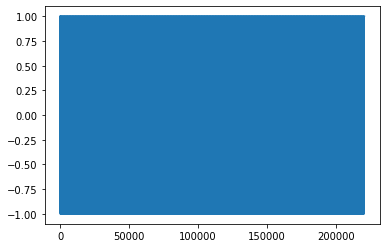

In [43]:
music = sinusoid(seconds = 5, freq = 100, amp = 1, initPhase = np.pi/2, wave = "square")
plt.plot(music)

In [44]:
Audio(music, rate=samplingFreq)

In [30]:
def filters(audio : list, cutoff : float, type_ : str) -> list:
    output = np.copy(audio)
    if type_ == "lowpass":
        for index, value in enumerate(audio):
            if value > cutoff:
                output[index] = 0
            else:
                pass
    elif type_ == "highpass":
        for index, value in enumerate(audio):
            if value < cutoff:
                output[index] = 0
            else:
                pass
    return output

Audio(music, rate=samplingFreq)

In [31]:
Audio(filters(music, -2, "lowpass"), rate=samplingFreq)

In [35]:
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [36]:
ff = butter_lowpass_filter(music, 3, samplingFreq/2)

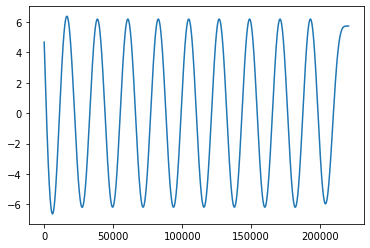

In [37]:
plt.plot(ff)
Audio(ff, rate=samplingFreq)

In [ ]:
def filter_(x : list, cut : float, type_ : str) -> list:
    y = [0]*len(x)
    for n in range(4, len(x)):
        y[n] = 0.0101*x[n] - 0.0202*x[n-2] + 0.0101*x[n-4] + 2.4354*y[n-1] - 3.1869*y[n-2] + 2.0889*y[n-3] - 0.7368*y[n-4]
        if type_ == "lowpass":
            if y[n] > cut:
                y[n] = 0
            else:
                pass
        elif type_ == "highpass":
            if y[n] < cut:
                y[n] = 0
            else:
                pass
    return y

In [ ]:
aa = filter_(music, 2)

In [244]:
Audio(aa, rate=44100)

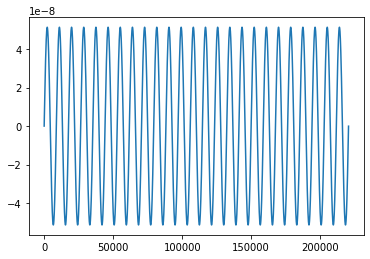

In [245]:
plt.plot(aa)

In [131]:
def butter_bandpass(lowcut, highcut, fs, order = 5):
    nyquist = fs * 0.5
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype = 'band')
    #print("a = {} ... b = {}".format(a, b))
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order = 5):
    b, a = butter_bandpass(lowcut, highcut, fs, order = order)
    y = lfilter(b, a, data)
    return y


#slider = widgets.IntSlider(min=1, max=1000, value=500)
#slider2 = widgets.IntSlider(min=1, max=1000, value=500)
filtered = butter_bandpass_filter(music, 5, 100, samplingFreq)
#interact(butter_bandpass_filter, lowcut=slider, highcut=slider2, fs=samplingFreq)

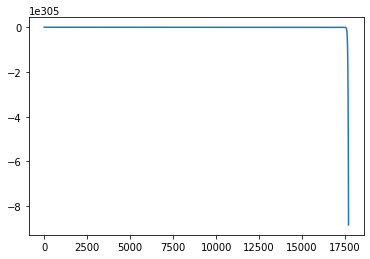

In [132]:
plt.plot(filtered)